In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

### CRC

In [2]:
df = pd.read_csv('WD-76845-002.csv')

In [3]:
markers = ['CD3',
       'Ki67', 'CD4', 'CD20', 'CD163', 'Ecadherin', 'LaminABC', 'PCNA',
       'NaKATPase', 'Keratin', 'CD45', 'CD68', 'FOXP3',
       'Vimentin', 'Desmin', 'Ki67_570', 'CD45RO', 'aSMA',
       'PD1', 'CD8a', 'PDL1', 'CDX2', 'CD31', 'Collagen']

In [4]:
adata = ad.AnnData(X = df[markers], obs = df[[c for c in list(df.columns) if c not in markers]])

/home/users/watsocam/miniconda3/envs/dctest/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
adata.var_names

Index(['CD3', 'Ki67', 'CD4', 'CD20', 'CD163', 'Ecadherin', 'LaminABC', 'PCNA',
       'NaKATPase', 'Keratin', 'CD45', 'CD68', 'FOXP3', 'Vimentin', 'Desmin',
       'Ki67_570', 'CD45RO', 'aSMA', 'PD1', 'CD8a', 'PDL1', 'CDX2', 'CD31',
       'Collagen'],
      dtype='object')

In [6]:
adata.X = np.log1p(adata.X)
sc.pp.scale(adata)

In [7]:
sc.pp.neighbors(adata)

2024-11-13 12:31:08.040124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-13 12:31:08.040186: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
sc.tl.umap(adata)

In [9]:
sc.tl.leiden(adata, resolution = 0.5)

/home/users/watsocam/miniconda3/envs/dctest/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


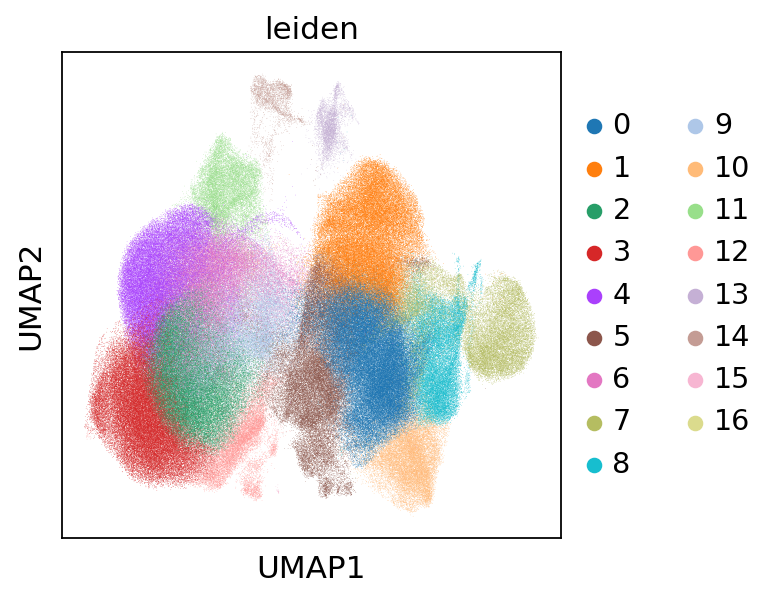

In [ ]:
sc.set_figure_params(dpi_save = 500)
sc.pl.umap(adata, color='leiden', save='Figure_3C_umap.png')

In [ ]:
df = pd.DataFrame(adata.X, columns = adata.var_names)
df['CellID'] = range(1, len(df)+1)
df['cell_type'] = list(adata.obs.leiden)
df['X_centroid'] = list(adata.obs['X'])
df['Y_centroid'] = list(adata.obs['Y'])

df.to_csv('crc_wsi_leiden_log1p_r05.csv', index = False)

### Tonsil

In [ ]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

sc.set_figure_params(dpi_save = 500)

# read data
df = pd.read_csv('unmicst-TNP_pilot_cycif.csv')

# markers of interest
markers = ['anti_NaKATPase_cellMask', 'anti_CD3_cellMask',
       'anti_CD45RO_cellMask',  'Ki67_488_cellMask',
       'Keratin_570_cellMask', 'aSMA_660_cellMask', 
       'CD8a_488_cellMask', 'CD4_570_cellMask', 'CD45_647_cellMask',
        'CD20_488_cellMask', 'CD11c_555_cellMask',
       'PD1_647_cellMask',  'CD68_488_cellMask',
       'FOXP3_570_cellMask', 'PDL1_647_cellMask',
       'CD163_488_cellMask', 'H3_PE_cellMask', 'CD31_647_cellMask',
        'Ecad_488_cellMask', 'Vimentin_555_cellMask',
       'Catenin_647_cellMask', 'LaminAC_488_cellMask',
       'pH3_555_cellMask', 'H2ax_647_cellMask']

# convert to anndata format
adata = ad.AnnData(X = df[markers], obs = df[[c for c in list(df.columns) if c not in markers]])

print(adata.var_names)

# log and scale markers
adata.X = np.log1p(adata.X)
sc.pp.scale(adata)

print('Running neighbors')
sc.pp.neighbors(adata)

print('Running UMAP')
sc.tl.umap(adata)

print('Running Leiden')
sc.tl.leiden(adata, resolution = 0.5)

adata.write_h5ad('tonsil_wsi_cycif_leiden_r05.h5ad')

print('Plotting')
sc.pl.umap(adata, color='leiden', save='Figure_3B_umap.png')

# write out to csv
df = pd.DataFrame(adata.X, columns = adata.var_names)
df['CellID'] = range(1, len(df)+1)
df['cell_type'] = list(adata.obs.leiden)
df['X_centroid'] = list(adata.obs['X_centroid'])
df['Y_centroid'] = list(adata.obs['Y_centroid'])

df.to_csv('tonsil_wsi_cycif_leiden_r05.csv', index = False)